In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
lambdas = np.linspace(0, 1, 1001)
M = 5000 #热化
N = 10000 #单个参数迭代次数
epsilon = 0.001


In [28]:
X = np.zeros((1001, N))
x = [] #记录参数值
y = [] #记录参数对应的X
z = np.zeros(1001,dtype=int) #记录参数对应的稳定值数目
for j in range(1001):
    X[j,0] = 0.5
    lam = lambdas[j]
    for i in range(N-1):
        X[j,i+1] = lam*np.sin(np.pi*X[j,i])
        if i==M: #热化后开始记录参数
            z[j]+=1
            y.append(X[j,i+1])
            x.append(lam)
        if abs(X[j,i]-X[j,i+1])>epsilon and i>M:
            test = 0
            for k in range(1,z[j]+1):
                if abs(y[-k]-X[j,i+1])<epsilon: #查找重合数
                    test = 1
                    break
            if test==0:
                y.append(X[j,i+1])
                x.append(lam)
                z[j]+=1


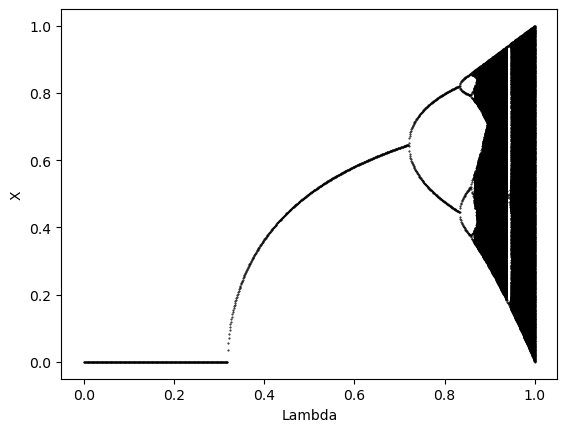

In [33]:
plt.figure()
plt.scatter(x, y, s=0.2, c='k')
plt.xlabel('Lambda')
plt.ylabel('X')
plt.show()

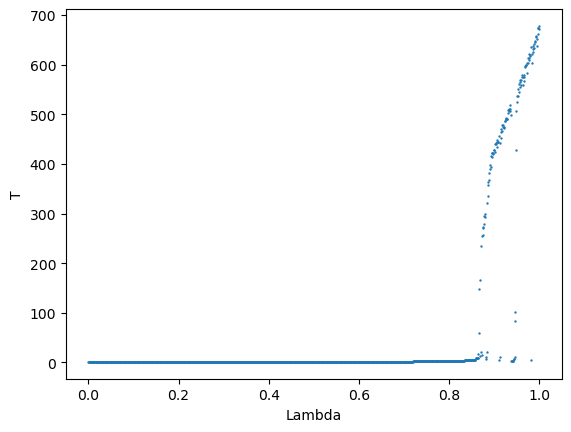

In [35]:
plt.scatter(lambdas, z, s=0.5)
plt.xlabel('Lambda')
plt.ylabel('T')
plt.show()

In [38]:
#将数据存入文件
df = pd.DataFrame({'Lambda': x, 'X': y})

# Writing DataFrame to a text file
file_path = 'data.txt'
df.to_csv(file_path, sep='\t', index=True)

Feigenbaum 常数

In [30]:
for i in range(1001):
    if z[i+1] > 100:
        break
    if z[i+1]!=z[i]:
        print("T={}, lambda={}".format(z[i+1],lambdas[i+1]))

T=2, lambda=0.72
T=4, lambda=0.834
T=8, lambda=0.859
T=16, lambda=0.865
T=59, lambda=0.866


In [37]:
for i in range(len(y)):
    if y[i]<0.505 and y[i]>0.495 and z[int(x[i]*1000)]!=1:
        print("T={}, lambda={}".format(z[int(x[i]*1000)], x[i]))
        if z[int(x[i]*1000)]==16:
            break

#后续过程通过data.txt，手动读出

T=2, lambda=0.774
T=2, lambda=0.775
T=2, lambda=0.776
T=2, lambda=0.777
T=2, lambda=0.778
T=2, lambda=0.779
T=2, lambda=0.78
T=2, lambda=0.781
T=4, lambda=0.845
T=4, lambda=0.846
T=4, lambda=0.847
T=4, lambda=0.848
T=8, lambda=0.861
T=8, lambda=0.862
T=16, lambda=0.865
